# Crank Nicolson method

We start off with the heat equation:


$$\frac{\partial u}{\partial t}=c^2\frac{\partial^2 u}{\partial x^2}$$

which we discretise as follows:

$$\frac{u_{i, j+1}-u_{i,j}}{k}=\frac{c^2}{2}\left(\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{h^2}+\frac{u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}}{h^2}\right)$$

This is a second-order in time discretization, where the RHS has been centred in time.

### The r-factor:

$$r=\frac{k\,c^2}{h^2}$$



### Implicit-explicit form:

$$2u_{i, j+1}-r\left(u_{i+1,j+1}-2u_{i,j+1}+u_{i-1,j+1}\right)=2u_{i,j}+r\left(u_{i+1,j}-2u_{i,j}+u_{i-1,j}\right)$$

$$\Rightarrow -r\,u_{i+1,j+1}+2u_{i, j+1}(1+r)-r\,u_{i-1,j+1}=r\,u_{i+1,j}+2(1-r)u_{i,j}+r\,u_{i-1,j}$$


As we can see, we are using 6 points.


### In matrix form:

$$
\begin{bmatrix}
2(1+r) & -r & 0\cdots \\
-r & 2(1+r) & 0\cdots \\
\cdots & \cdots & \cdots \\
\cdots & \cdots & -r \\
0 & -r & 2(1+r)\cdots \\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
u_{i-1,j+1} \\
u_{i,j+1} \\
u_{i+1,j+1} \\
\cdots \\
\end{bmatrix}=
\begin{bmatrix}
2(1-r) & r & 0\cdots \\
r & 2(1-r) & 0\cdots \\
\cdots & \cdots & \cdots \\
\cdots & \cdots & r \\
0 & r & 2(1-r)\cdots \\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
u_{i-1,j} \\
u_{i,j} \\
u_{i+1,j} \\
\cdots \\
\end{bmatrix}+
\begin{bmatrix}
r(u_{0,0}+u_{0,1}) \\
\cdots \\
0 \\
\cdots \\
r(u_{n,0}+u_{n,1}) \\
\end{bmatrix}
$$


### Heat equation: metal heated in the middle

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### 1. Domain definition:

In [2]:
# Steps:

h = 0.0025 # Step size -> delta_x
k = 0.0025 # Time step -> delta_t

# Time and Space Vectors
x = np.arange(0., 1. + h, h)

t = np.arange(0., 0.1 + k, k)

print(len(x)) # Matrices should n-2 x n-2 = 39x39 

401


In [3]:
# Fix the dif. coef:
c_2 = 1.0

# Define the r_factor
r_factor = c_2*k/h**2

print(r_factor)

400.0


### 2. Set up the ICs/BCs:

In [4]:
# Initial conditions

ics = np.sin(np.pi*x)

# Boundary conditions

bcs = [0., 0.] # Fix temperatures at the edges (T=0 C)

### 3. Create the sln array for $T(x,t)$

In [5]:
# Matrix for temperatures

n = len(x)
m = len(t)

T = np.zeros((n,m))

#print(T.shape)

#print(T.T)

In [6]:
# Safe checks:

#print(T.shape)

#print(np.unique(T))

### 4. Fill up the matrix elements with the ICs/BCs:

In [7]:
# Add the bcs:

T[0, :] = bcs[0]

T[-1, :] = bcs[1]


# Add the ics

T[:, 0] = ics


In [8]:
# Safe check:

#print(T.T)

### 5. Fill up the inner elements of the first matrix ($D_1$):

### In matrix form:

$$D_1=
\begin{bmatrix}
2(1+r) & -r & 0\cdots \\
-r & 2(1+r) & 0\cdots \\
\cdots & \cdots & \cdots \\
\cdots & \cdots & -r \\
0 & -r & 2(1+r)\cdots \\
\end{bmatrix}
$$


In [9]:
# Fill up the main diagonal:

D1_matrix_0 = np.diag([2 + 2*r_factor]*(n - 2), 0)



In [10]:
# Fill upthe -1 diag matrix

D1_matrix_n = np.diag([-r_factor]*(n - 3), -1)



In [11]:
# Fill upthe +1 diag matrix

D1_matrix_p = np.diag([-r_factor]*(n - 3), +1)

print(D1_matrix_p)
print(D1_matrix_p.shape)

[[   0. -400.    0. ...    0.    0.    0.]
 [   0.    0. -400. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0. -400.    0.]
 [   0.    0.    0. ...    0.    0. -400.]
 [   0.    0.    0. ...    0.    0.    0.]]
(399, 399)


In [12]:
# Sum your matrices

D1_matrix   = D1_matrix_0 + D1_matrix_n + D1_matrix_p

print(D1_matrix)
print(D1_matrix.shape)

[[ 802. -400.    0. ...    0.    0.    0.]
 [-400.  802. -400. ...    0.    0.    0.]
 [   0. -400.  802. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...  802. -400.    0.]
 [   0.    0.    0. ... -400.  802. -400.]
 [   0.    0.    0. ...    0. -400.  802.]]
(399, 399)


### 5. Fill up the inner elements of the second matrix ($D_2$):

### In matrix form:

$$
D_2=\begin{bmatrix}
2(1-r) & r & 0\cdots \\
r & 2(1-r) & 0\cdots \\
\cdots & \cdots & \cdots \\
\cdots & \cdots & r \\
0 & r & 2(1-r)\cdots \\
\end{bmatrix}
$$


In [13]:
# Same process:
D2_matrix_0 = np.diag([2 - 2*r_factor]*(n - 2), 0)

D2_matrix_n = np.diag([r_factor]*(n - 3), -1)

D2_matrix_p = np.diag([r_factor]*(n - 3), +1)

D2_matrix   = D2_matrix_0 + D2_matrix_n + D2_matrix_p

print(D2_matrix)
print(D2_matrix.shape)

[[-798.  400.    0. ...    0.    0.    0.]
 [ 400. -798.  400. ...    0.    0.    0.]
 [   0.  400. -798. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -798.  400.    0.]
 [   0.    0.    0. ...  400. -798.  400.]
 [   0.    0.    0. ...    0.  400. -798.]]
(399, 399)


### 6. Create the b vector (vector of known values):

#### Solve the linear system of eqs:

E.g. from the ICs.

$$
\begin{bmatrix}
2(1-r) & r & 0\cdots \\
r & 2(1-r) & 0\cdots \\
\cdots & \cdots & \cdots \\
\cdots & \cdots & r \\
0 & r & 2(1-r)\cdots \\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
u_{i-1,j} \\
u_{i,j} \\
u_{i+1,j} \\
\cdots \\
\end{bmatrix}+
\begin{bmatrix}
r(u_{0,0}+u_{0,1}) \\
\cdots \\
0 \\
\cdots \\
r(u_{n,0}+u_{n,1}) \\
\end{bmatrix}
$$

In [14]:
for j in range(0, m-1):
    
    # Add initial conditions to initial b vector
    b = T[1:-1, j].copy()
    #print(b.shape)
    #print(b)
    
    # Evaluate RHS
    b = np.dot(D2_matrix, b)
    # b = D2_matrix@b (another option)
    #print(b)
    
    # Append missing values
    
    b[0]  = b[0]  + r_factor*(T[0, j+1] + T[0, j])
    b[-1] = b[-1] + r_factor*(T[-1, j+1] + T[-1, j])
    
    # Compute the solution vector:
    sln_b = np.linalg.solve(D1_matrix, b)
    
    # Update T matrix
    T[1:-1, j+1] = sln_b
    
#print(T.T)

#print(b)

### 7. Plotting the sln:

#### A. Temperature vs. Positon space:

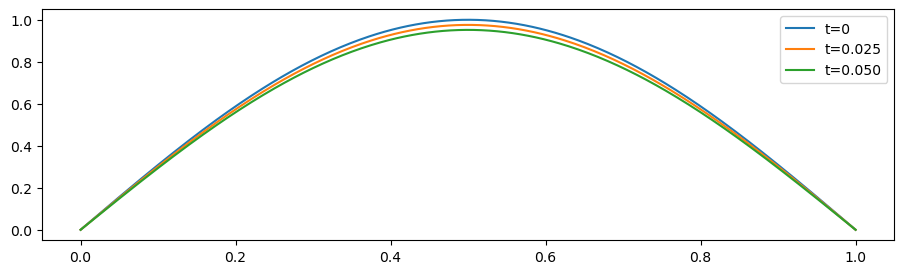

In [15]:
# Plotting
plt.figure(figsize=(11,3))

plt.plot(x, T[:, 0], label = 't=0')

plt.plot(x, T[:, 1], label = 't=0.025')

plt.plot(x, T[:, 2], label = 't=0.050')

plt.legend()
plt.show()

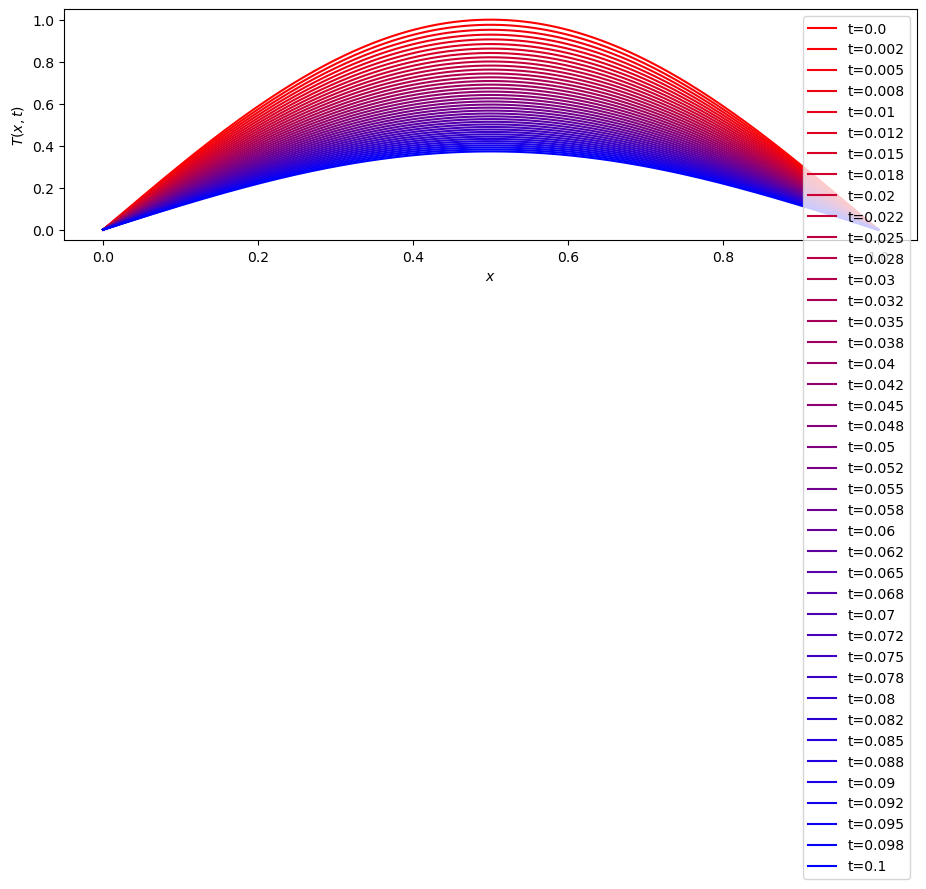

In [16]:
# Plotting
R = np.linspace(1, 0, m)
G = 0
B = np.linspace(0, 1, m)

# FIgure environment
plt.figure(figsize=(11,3))

for j in range(m):
    plt.plot(x, T[:, j] , color = [R[j], G, B[j]])

plt.legend([f't={t_value.round(3)}' for t_value in t])

plt.xlabel(r"$x$")
plt.ylabel(r"$T(x,t)$")
plt.show()

#### B. Temperature surface in 3D:

In [17]:
# Create a meshgrid
x_grid, t_grid = np.meshgrid(x, t)

print(x_grid.shape, t_grid.shape, T.shape)

(41, 401) (41, 401) (401, 41)


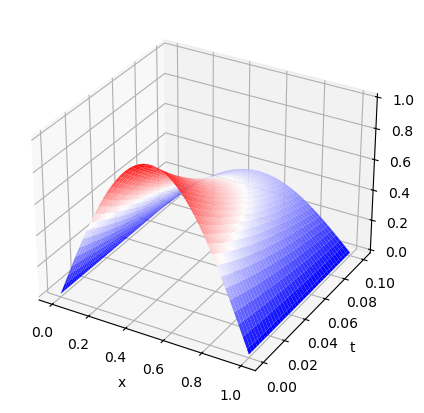

In [18]:

fig = plt.figure(figsize=(6,5))

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, T.T, cmap='bwr') # Creates 'n=10' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('t')
ax.set_zlabel('T')

plt.show()



#### C. Temperature surface projection:

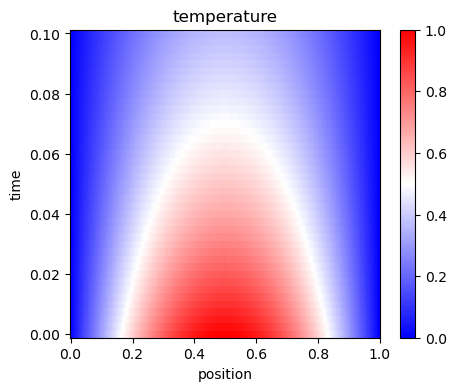

In [19]:
plt.figure(figsize=(5,4))

Z1 = plt.pcolor(x_grid, t_grid, T.T, cmap = 'bwr')

plt.xlabel("position")

plt.ylabel("time")

plt.title("temperature")

plt.colorbar(Z1)

plt.show()